In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 

In [29]:
data=pd.read_csv('Mydata.csv')
#Clean any N/A values
data.dropna()
data.head()

,Date,r_data,rv_data_not_scaled,day_of_week,Mon,Tues,Wed,Thurs,Fri,month_yr,Summer,Autumn,Winter,Spring,Season,RV_sc_sqr
0,2012-11-06,0.002384,0.000016,1,0,1,0,0,0,11,0,0,0,1,4,0.401941
1,2014-06-16,0.001343,0.000013,0,1,0,0,0,0,6,0,0,1,0,3,0.354417
2,2009-12-04,-0.015275,0.000021,4,0,0,0,0,1,12,1,0,0,0,1,0.455920
3,2001-06-14,0.006085,0.000023,3,0,0,0,1,0,6,0,0,1,0,3,0.483974
4,2014-10-20,0.009011,0.000020,0,1,0,0,0,0,10,0,0,0,1,4,0.447861


I clean any N/A value that appear in the data, but since the number of row in the data are the same after removing any N/A value, this indicate data is complete. I didn't remove any outliers that appear in the data, since removing any outliers require a good reasoning for it (could be measurement error or others things), also removing outlier will also caused the data to be bias.

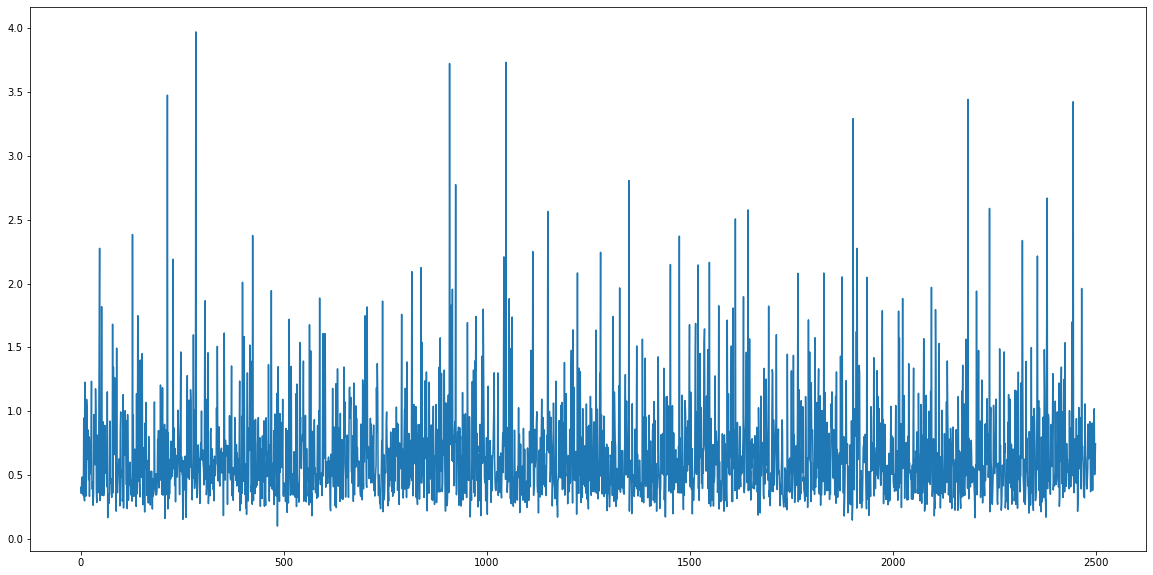

In [3]:
plt.figure(figsize=(20,10))
data['RV_sc_sqr'].plot()

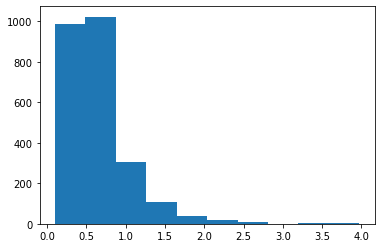

In [4]:
plt.hist(data['RV_sc_sqr'])
plt.show()

In [5]:
from scipy import stats
stats.describe(data['RV_sc_sqr'])

DescribeResult(nobs=2500, minmax=(0.09899360425299146, 3.972354140179674), mean=0.6632923904818956, variance=0.16076983570675618, skewness=2.5285571688600696, kurtosis=10.710493278212446)

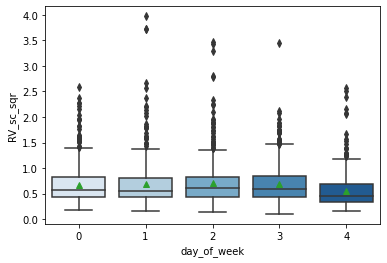

In [6]:
sns.boxplot(x='day_of_week', y='RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [7]:
data.loc[data['day_of_week'] == 0, 'RV_sc_sqr'].describe()

count    494.000000
mean       0.676919
std        0.383166
min        0.177820
25%        0.426537
50%        0.563251
75%        0.818781
max        2.588705
Name: RV_sc_sqr, dtype: float64

In [8]:
data.loc[data['day_of_week'] == 1, 'RV_sc_sqr'].describe()

count    523.000000
mean       0.682668
std        0.440910
min        0.164146
25%        0.423333
50%        0.556359
75%        0.808012
max        3.972354
Name: RV_sc_sqr, dtype: float64

In [9]:
data.loc[data['day_of_week'] == 2, 'RV_sc_sqr'].describe()

count    508.000000
mean       0.699695
std        0.426443
min        0.145937
25%        0.438688
50%        0.602435
75%        0.815977
max        3.476575
Name: RV_sc_sqr, dtype: float64

In [10]:
data.loc[data['day_of_week'] == 3, 'RV_sc_sqr'].describe()

count    502.000000
mean       0.695796
std        0.386407
min        0.098994
25%        0.425119
50%        0.598843
75%        0.842026
max        3.442913
Name: RV_sc_sqr, dtype: float64

In [11]:
data.loc[data['day_of_week'] == 4, 'RV_sc_sqr'].describe()

count    473.000000
mean       0.554043
std        0.337502
min        0.151579
25%        0.332184
50%        0.458785
75%        0.686652
max        2.565640
Name: RV_sc_sqr, dtype: float64

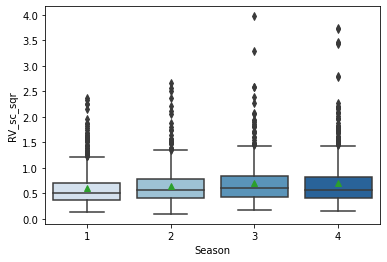

In [12]:
sns.boxplot(x='Season', y='RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [13]:
data.loc[data['Season'] == 1, 'RV_sc_sqr'].describe()

count    601.000000
mean       0.606153
std        0.364473
min        0.145937
25%        0.367008
50%        0.501545
75%        0.710157
max        2.377114
Name: RV_sc_sqr, dtype: float64

In [14]:
data.loc[data['Season'] == 2, 'RV_sc_sqr'].describe()

count    637.000000
mean       0.650069
std        0.342140
min        0.098994
25%        0.415261
50%        0.566565
75%        0.789247
max        2.670159
Name: RV_sc_sqr, dtype: float64

In [15]:
data.loc[data['Season'] == 3, 'RV_sc_sqr'].describe()

count    633.000000
mean       0.696448
std        0.397734
min        0.167426
25%        0.435890
50%        0.612434
75%        0.842058
max        3.972354
Name: RV_sc_sqr, dtype: float64

In [16]:
data.loc[data['Season'] == 4, 'RV_sc_sqr'].describe()

count    629.000000
mean       0.697913
std        0.479032
min        0.164460
25%        0.406652
50%        0.559652
75%        0.818822
max        3.733462
Name: RV_sc_sqr, dtype: float64

Exploratory analysis that I conduct reveals a few things:

 RV is a highly, positively skewed ($S=2.53$) and fat-tailed (Kurtosis $= 10.7$) variable, subject to outliers. 
 Both the sample skewness and kurtosis are very high. This tell us the number of outliers are high.

 The timeseries plot that I plot didn't show any pattern, this could cause by data  the randomised date in the data, 
 from the observation I conclude that each data are independent to each other.
 
 From the boxplot of days of week plotted with RV_sc_sqr, I observe that average RV_sc_sqr on day of weeks 4 (Friday) is significantly lower compared to other days of week and this observation repeated for the boxplot of seasons plotted with RV_sc_sqr, average of RV_sc_sqr in season 1 (Summer) compared to other seasons.
 
 Friday's average RV_sc_sqr is lower by 16.5% compared to average RV_sc_sqr of a week (sum of all average RV_sc_sqr in each day divided by number of days), for Summer's average RV_sc_sqr lower by 8.6% compared to average RV_sc_sqr of the whole season in a year (sum of all average RV_sc_sqr in each season divided by number of seasons)


In [17]:
model1 = smf.ols(formula='RV_sc_sqr ~ C(day_of_week)', data=data) 
reg1 = model1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.28
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.51e-09
Time:                        20:16:58   Log-Likelihood:                -1239.7
No. Observations:                2500   AIC:                             2489.
Df Residuals:                    2495   BIC:                             2519.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6769      0.018     37.831      0.000       0.642       0.712
C(day_of_week)[T.1]     0.0057      0.025      0.230      0.818      -0.043       0.055
C(day_of_week)[T.2]     0.0228      0.025      0.906      0.365      -0.027       0.072
C(day_of_week)[T.3]     0.0189      0.025      0.749      0.454      -0.031       0.068
C(day_of_week)[T.4]    -0.1229      0.026     -4.803      0.000      -0.173      -0.073
==============================================================================
Omnibus:                     1432.639   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14917.870
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                      13.829   Cond. No.                         5.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction equation from the output is:
 
$\text{RV_sc_sqr} = 0.6769 + 0.0057 \times \text{Tuesday} + 0.0228 \times \text{Wednesday} + 0.0189 \times \text{Thursday} - 0.1229 \times \text{Friday}$

The five predictions for RV_sc_sqr, for each category of day_of_week are:

$\text{RV_sc_sqr} = 0.6769$, when $\text{Tues} = \text{Wed} = \text{Thurs} = \text{Fri} = 0$, i.e. day_of_week $= 0$ (Monday)

$\text{RV_sc_sqr} = 0.67969 + 0.0057 = 0.68539$, when $\text{Tues} = 1, \text{Wed} = \text{Thurs} = \text{Fri} = 0$, i.e. day_of_week $= 1$ (Tuesday)

$\text{RV_sc_sqr} = 0.67969 + 0.0228 = 0.704249$, when $\text{Wed} = 1, \text{Tues} = \text{Thurs} = \text{Fri} = 0$, i.e. day_of_week $= 2$ (Wednesday)

$\text{RV_sc_sqr} = 0.67969 + 0.0189 = 0.69859$, when $\text{Thurs} = 1, \text{Tues} = \text{Wed} = \text{Fri} = 0$, i.e. day_of_week $= 3$ (Thursday)

$\text{RV_sc_sqr} = 0.67969 - 0.1229 = 0.55679$, when $\text{Fri} = 1, \text{Tues} = \text{Wed} = \text{Thurs} = 0$, i.e. day_of_week $= 4$ (Friday)


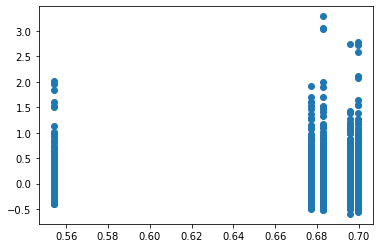

In [18]:
res1 = reg1.resid
fit1 = reg1.fittedvalues
plt.scatter(fit1,res1)
#plt.show()

In [19]:
table1 = sm.stats.anova_lm(reg1, typ=1)
table1

,df,sum_sq,mean_sq,F,PR(>F)
C(day_of_week),4.0,7.137095,1.784274,11.280947,4.506149e-09
Residual,2495.0,394.626724,0.158167,NaN,NaN


ANOVA table

| Source     |    SS         |   df   | Mean square |    F    |          p-val          |
|------------|---------------|--------|-------------|---------|-------------------------|
| Day of week|  7.137095     |   4    |  1.784274   |11.280947| 4.506 $\times 10^{-9}$  |
| Residuals  |  394.626724   |  2495  |  0.158167   |         |                         |
| Total      |  401.763819   |  2499  |             |         |                         |  

The hypotheses are: 

$H_0 \, : \, \mu_0 = \mu_1 = \mu_2 = \mu_3 = \mu_4$ 

$H_1 \, : \, \text{at least one pair of means are not equal}$

I choose $\alpha=0.05$ as standard. I assume MLR LSA 1-6.

1. the groups are independent and the data iid in each group. I assumes the distribution of RV_sc_sqr is the same within each group and is only affected by days of week. LSA 1-3 are satissfied in here
2. The data have finite 4th moments in each group, since price of stock have a finite range (bounded random variable), so the volatility of the stock itself is finite (RV_sc_sqr), this assumption is satisfied.
3. CLT is satisfied, needing at least 30 observations in each group. This is clearly satisifed here.  
4. Homoskedasticity are not quiet satisfied. The variences in each group are not equal based on the residual plot.

The test statistic is $F_{stat} = 11.280947$ which follows an $F_{4, 2495}$ distribution under the null hypothesis. The p-value is $P(F_{4, 2495} > 11.28) = 4.51 \times 10^{-9} = 0.000000000451$. Since the p-value $0.000000000451 < 0.05$ we reject the null and conclude that average RV_sc_sqr differs significantly among at least two of the day of week groups.

Model $adjR^2=0.016$, which told me that 1.6% of the variences in market volatility explained by the OLS model that I produce, this value indicates weak fit of model to the data.

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['RV_sc_sqr'], data['day_of_week'])
result1 = mc.tukeyhsd()
print(result1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0057    0.9 -0.0624  0.0739  False
     0      2   0.0228 0.8909 -0.0458  0.0914  False
     0      3   0.0189    0.9 -0.0499  0.0877  False
     0      4  -0.1229  0.001 -0.1927  -0.053   True
     1      2    0.017    0.9 -0.0506  0.0847  False
     1      3   0.0131    0.9 -0.0547   0.081  False
     1      4  -0.1286  0.001 -0.1975 -0.0597   True
     2      3  -0.0039    0.9 -0.0722  0.0644  False
     2      4  -0.1457  0.001  -0.215 -0.0763   True
     3      4  -0.1418  0.001 -0.2113 -0.0722   True
----------------------------------------------------


By Tukey's method, I am (at least) 95% confident that the mean RV_sc_sqr for the 4th group of day of week (Friday), 4 and 0, 4 and 1, 4 and 2, 4 and 3  are all significantly different to each other. The data clearly suggest that average RV_sc_sqr for day of week 4 (Friday) is significantly lower than other day of week (day of week 0 (Monday), day of week 1 (Tuesday), day of week 2 (Wednesday), day of week 3 (Thursday))

In [21]:
model2 = smf.ols(formula='RV_sc_sqr ~ C(Season)', data=data) 
reg2 = model2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.361
Date:                Sun, 09 May 2021   Prob (F-statistic):           6.55e-05
Time:                        20:16:58   Log-Likelihood:                -1251.1
No. Observations:                2500   AIC:                             2510.
Df Residuals:                    2496   BIC:                             2534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6062      0.016     37.202      0.000       0.574       0.638
C(Season)[T.2]     0.0439      0.023      1.933      0.053      -0.001       0.088
C(Season)[T.3]     0.0903      0.023      3.969      0.000       0.046       0.135
C(Season)[T.4]     0.0918      0.023      4.027      0.000       0.047       0.136
==============================================================================
Omnibus:                     1411.075   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14138.766
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                      13.513   Cond. No.                         4.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction equation from the output is:
 
$\text{RV_sc_sqr} = 0.6062 + 0.0439 \times \text{Autumn} + 0.0903 \times \text{Winter} + 0.0918 \times \text{Spring}$

The four predictions for RV_sc_sqr, for each category of Season are:

$\text{RV_sc_sqr} = 0.6062$, when $\text{Autumn} = \text{Winter} = \text{Spring} = 0$, i.e. Season $= 1$ (Summer)

$\text{RV_sc_sqr} = 0.6062 + 0.0439 = 0.6501$, when $\text{Autumn} = 1, \text{Winter} = \text{Spring} = 0$, i.e. Season $= 2$ (Autumn)

$\text{RV_sc_sqr} = 0.6062 + 0.0903 = 0.6965$, when $\text{Winter} = 1, \text{Autumn} = \text{Spring} = 0$, i.e. Season $= 3$ (Winter)

$\text{RV_sc_sqr} = 0.6062 + 0.0918 = 0.698$, when $\text{Spring} = 1, \text{Autumn} = \text{Winter} = 0$, i.e. Season $= 4$ (Spring)

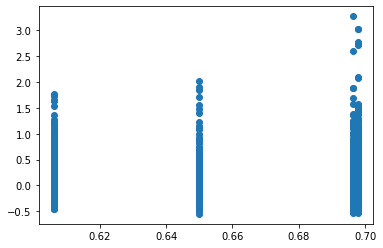

In [22]:
res2 = reg2.resid
fit2 = reg2.fittedvalues
plt.scatter(fit2,res2)
#plt.show()

In [23]:
table2 = sm.stats.anova_lm(reg2, typ=1)
table2

,df,sum_sq,mean_sq,F,PR(>F)
C(Season),3.0,3.523371,1.174457,7.360992,0.000066
Residual,2496.0,398.240448,0.159551,NaN,NaN


ANOVA table

| Source     |    SS         |   df   | Mean square |    F    |          p-val          |
|------------|---------------|--------|-------------|---------|-------------------------|
| Season     |  3.523371     |   3    |  1.174457   | 7.360992| 6.6 $\times 10^{-5}$    |
| Residuals  |  398.240448   |  2496  |  0.159551   |         |                         |
| Total      |  401.763819   |  2499  |             |         |                         |  

The hypotheses are: 

$H_0 \, : \, \mu_1 = \mu_2 = \mu_3 = \mu_4$ 

$H_1 \, : \, \text{at least one pair of means are not equal}$

I choose $\alpha=0.05$ as standard. I assume MLR LSA 1-6.

1. the groups are independent and the data iid in each group. I assumes the distribution of RV_sc_sqr is the same within each group and is only affected by Season. The data is iid and each group are independent are satissfied in here.
2. The data have finite 4th moments in each group, since price of stock have a finite range (bounded random variable) so the volatility of the stock itself is finite (RV_sc_sqr), this assumption is satissfied.
3. CLT is satisfied, needing at least 30 observations in each group. This is clearly satisifed here.
4. Homoskedasticity assumption are not quite satissfied. The variance in each groups differ based on the residuals plot.

The test statistic is $F_{stat} = 7.360992$ which follows an $F_{3, 2496}$ distribution under the null hypothesis. The p-value is $P(F_{3, 2496} > 7.36) = 6.6 \times 10^{-5} = 0.000066$. Since the p-value $0.000066 < 0.05$ we reject the null and conclude that average RV_sc_sqr differs significantly among at least two of Season groups.

Model $adjR^2=0.008$, which told me that 0.8% of the variences in market volatility explained by the OLS model that I produce, this value indicates weak fit of model to the data and the value in here are half compared to $adjR^2$ of day of week model.

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc2 = MultiComparison(data['RV_sc_sqr'], data['Season'])
result2 = mc2.tukeyhsd()
print(result2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0439 0.2144 -0.0145 0.1023  False
     1      3   0.0903  0.001  0.0318 0.1488   True
     1      4   0.0918  0.001  0.0332 0.1503   True
     2      3   0.0464 0.1638 -0.0113  0.104  False
     2      4   0.0478 0.1436 -0.0099 0.1056  False
     3      4   0.0015    0.9 -0.0563 0.0593  False
---------------------------------------------------


By Tukey's method, I am (at least) 95% confident that the mean RV_sc_sqr for the 1st group of Season (Summer), 1 and 3, 1 and 4 are significantly different to each other. The data clearly suggest that average RV_sc_sqr for season 1 (Summer) is significantly lower than season 3 (Winter) and season 4 (Spring) but not compared to season 2 (Autumn).

As I have done data cleaning earlier in the assignment, there is no need of doing further data cleaning. For data manipulation, I have an option to do log transformation in the data and data thinning for the data. Log transformation is not needed as the original data itself are suitable enough and data thinning is not suitable in here cause it could violate the rule of CLT and the data already being randomized and thinned from its original data that we could found in tutorial 3.

In [25]:
model3 = smf.ols(formula='RV_sc_sqr ~ C(day_of_week) + C(Season) + C(day_of_week):C(Season)', data=data) 
reg3 = model3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.464
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.29e-10
Time:                        20:16:59   Log-Likelihood:                -1220.1
No. Observations:                2500   AIC:                             2480.
Df Residuals:                    2480   BIC:                             2597.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.6122      0.036     17.015      0.000       0.542       0.683
C(day_of_week)[T.1]                    0.0339      0.051      0.666      0.505      -0.066       0.134
C(day_of_week)[T.2]                    0.0442      0.051      0.872      0.383      -0.055       0.144
C(day_of_week)[T.3]                    0.0514      0.051      1.001      0.317      -0.049       0.152
C(day_of_week)[T.4]                   -0.1613      0.051     -3.156      0.002      -0.261      -0.061
C(Season)[T.2]                         0.0758      0.050      1.507      0.132      -0.023       0.174
C(Season)[T.3]                         0.0928      0.051      1.827      0.068      -0.007       0.192
C(Season)[T.4]                         0.0889      0.051      1.759      0.079      -0.010       0.188
C(day_of_week)[T.1]:C(Season)[T.2]    -0.0696      0.070     -0.989      0.323      -0.208       0.068
C(day_of_week)[T.2]:C(Season)[T.2]    -0.0597      0.071     -0.844      0.399      -0.198       0.079
C(day_of_week)[T.3]:C(Season)[T.2]    -0.0866      0.071     -1.221      0.222      -0.226       0.053
C(day_of_week)[T.4]:C(Season)[T.2]     0.0447      0.073      0.614      0.539      -0.098       0.188
C(day_of_week)[T.1]:C(Season)[T.3]    -0.0286      0.071     -0.403      0.687      -0.168       0.111
C(day_of_week)[T.2]:C(Season)[T.3]    -0.0526      0.071     -0.738      0.460      -0.192       0.087
C(day_of_week)[T.3]:C(Season)[T.3]    -0.0475      0.072     -0.656      0.512      -0.190       0.094
C(day_of_week)[T.4]:C(Season)[T.3]     0.1195      0.071      1.675      0.094      -0.020       0.259
C(day_of_week)[T.1]:C(Season)[T.4]    -0.0145      0.071     -0.204      0.838      -0.154       0.125
C(day_of_week)[T.2]:C(Season)[T.4]     0.0286      0.071      0.401      0.689      -0.111       0.168
C(day_of_week)[T.3]:C(Season)[T.4]     0.0034      0.071      0.048      0.962      -0.136       0.143
C(day_of_week)[T.4]:C(Season)[T.4]    -0.0195      0.072     -0.269      0.788      -0.161       0.122
==============================================================================
Omnibus:                     1418.688   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14405.454
Skew:                           2.523   Prob(JB):                         0.00
Kurtosis:                      13.622   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction for equation the output is:

$\text{RV_sc_sqr} = 0.6112 + 0.0339 \times \text{Tuesday} + 0.0442 \times \text{Wednesday} + 0.0514 \times \text{Thursday} - 0.1612 \times \text{Friday} + 0.0758 \times \text{Autumn} + 0.0938 \times \text{Winter} + 0.0889 \times \text{Spring} - 0.0696 \times \text{Autumn} \times \text{Tuesday} - 0.0597 \times \text{Autumn} \times \text{Wednesday} - 0.0866 \times \text{Autumn} \times \text{Thursday} + 0.0447 \times{Autumn} \times \text{Friday} - 0.0286 \times \text{Winter} \times \text{Tuesday} - 0.0526 \times \text{Winter} \times \text{Wednesday} - 0.0451 \times \text{Winter} \times \text{Thursday} + 0.1195 \times \text{Winter} \times \text{Friday} - 0.0145 \times \text{Spring} \times \text{Tuesday} + 0.0286 \times \text{Spring} \times \text{Wednesday} + 0.0034 \times \text{Spring} \times \text{Thursday} - 0.0195 \times \text{Spring} \times \text{Friday}$


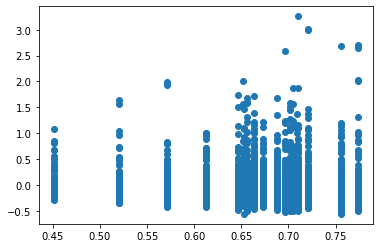

In [27]:
res3 = reg3.resid
fit3 = reg3.fittedvalues
plt.scatter(fit3,res3)
#plt.show()

In [26]:
table3 = sm.stats.anova_lm(reg3, typ=3)
table3

,sum_sq,df,F,PR(>F)
Intercept,45.350302,1.0,289.510450,1.713593e-61
C(day_of_week),3.760581,4.0,6.001766,8.359947e-05
C(Season),0.691022,3.0,1.470465,2.206109e-01
C(day_of_week):C(Season),2.575617,12.0,1.370201,1.726991e-01
Residual,388.479065,2480.0,NaN,NaN


ANOVA table

| Source     |    SS         |   df   | Mean square |    F    |          p-val          |
|------------|---------------|--------|-------------|---------|-------------------------|
| Day of week|  3.760581     |   4    |  0.94014525 | 6.001766| 8.3599 $\times 10^{-5}$ |
| Season     |  0.691022     |   3    |  0.23034067 | 1.470465| 2.2061 $\times 10^{-1}$ |
| Interaction|  2.575617     |   12   |  0.21463475 | 1.370201| 1.7270 $\times 10^{-1}$ |    
| Residuals  |  388.479065   |  2480  |  0.15664478 |         |                         |
| Total      |  395.506285   |  2499  |             |         |                         |  

First, test if day of week affects RV_sc_sqr:

The hypotheses are:  

$H_0 \, : \, \mu_0 = \mu_1 = \mu_2 = \mu_3 = \mu_4$  

$H_1 \, : \, $ At least one pair of means are not equal. 

I choose $\alpha = 0.05$ as standard. 

The F statistic is $6.001766$. Under the null hypothesis, and the LSA including equal variance, this statistic has an $F_{4,2480 }$ distrbution. The p-value is the chance of observing an $F_{4, 2480}$ variable as high as $6.001766$, or higher; i.e. 
p-value $= P(F_{4, 2480} \geq 6.001766) = 8.359947 \times 10^{-5} < 0.05 = \alpha$ thus reject the null and conclude that average RV_sc_sqr differs significantly among at least two of the day of week groups.

Second, test if Season affects RV_sc_sqr:

The hypotheses are:  

$H_0 \, : \, \mu_1 = \mu_2 = \mu_3 = \mu_4$

$H_1 \, : \, $ At least one pair of means are not equal. 

I choose $\alpha = 0.05$ as standard. 

The F statistic is $1.470465$. Under the null hypothesis, and the LSA including equal variance, this statistic has an $F_{3, 2480}$ distrbution. The p-value is the chance of observing an $F_{3, 2480}$ variable as high as $1.470465$, or higher; i.e. 
p-value $= P(F_{2, 517} \geq 1.470465) = 2.206109 \times 10^{-1} \approx 0.22061 > 0.05 = \alpha$ thus accept the null and conclude that average RV_sc_sqr equal among each season groups.

Interaction effect on RV_sc_sqr with the two categories variable which are day f week and seasons:

In here we assume i as (0,1,2,3,4) represent group in day of week and k as (1,2,3,4) represent group of season.

$H_0 \, : \, \mu_{i,k} = \mu_{0,1} = \mu_{0,2} = \mu_{0,3} = \mu_{0,4}, ..... , \mu_{4,1} = \mu_{4,2} = \mu_{4,3} = \mu_{4,4}$ 

$H_1 \, : \, $ At least one pair of means are not equal. 

I choose $\alpha = 0.05$ as standard. 

The F statistic is $1.370201$. Under the null hypothesis, and the LSA including equal variance, this statistic has an $F_{12, 2480}$ distrbution. The p-value is the chance of observing an $F_{12, 2480}$ variable as high as $1.370201$, or higher; i.e. 
p-value $= P(F_{12, 2480} \geq 1.370201) = 1.72 \times 10^{-1} \approx 0.17270 > 0.05 = \alpha$ thus accept the null and conclude that the effect of each predictor on average RV_sc_sqr equal over the category levels of the other predictor.

I assume MLR LSA 1-6 for two way ANOVA test.

1. the groups are independent and the data iid in each group. I assumes the distribution of RV_sc_sqr is the same within each group and is only affected by Season. The data is iid and each group are independent are satissfied in here.
2. The data have finite 4th moments in each group, since price of stock have a finite range (bounded random variable) so the volatility of the stock itself is finite (RV_sc_sqr), this assumption is satissfied.
3. CLT is satisfied, needing at least 30 observations in each group. This is clearly satisifed here.
4. Homoskedasticity assumption are not quite satissfied, The variance in each groups differ based on the residuals plot.

Model $adjR^2=0.026$, which told me that 2.6% of the variences in market volatility explained by the OLS model that I produce, this value is much better compared than the value given in individual model of both day of week and season. But this value indicates weak fit of model to the data

In summary I know that days of week and season both have significant effects on RV_sc_sqr (market volatility measured every 5 minutes) using one way ANOVA test. The F test conducted with RV_sc_sqr and day of week show that at least one pair of days of week has significantly different average of RV_sc_sqr compared to other (since I reject the null). The F test conducted with RV_sc_sqr and seasons with one way ANOVA show similar result, at least one pair of seasons has significantly different average of RV_sc_sqr compared to other (since I reject the null).

The average RV_sc_sqr are significantly lower on Friday compared to other days of week as its shown from the boxplot that I plotted before, this being confirmed by Tukey's method that I did. I find similar finding for the average RV_sc_sqr are significantly lower on summer compared to winter and spring but not with autumn, this result also showed in the boxplot.

Doing two way ANOVA, RV_sc_sqr with both day of week and seasons as predictors. From the F test I conducted, the result show one of group average for days of week was different.In the other hand, F test result show average of season being equal with all the groups of seasons. This findings are different from what I found in question 2. Overall the interection effects of day of week and season are not significant proven by the F test result.

At the end I conclude that day of week and seasons give significant effect to average RV_sc_sqr which are known also as 'market violatility' if their are independent from each other. This shown by the result of Friday having lower market violatility compared to other day in a week and for season, summer having lower market violatility compared to other season in a year. For the interaction effect between day of week and seasons does not differ significantly this told us that effect of combination between Monday with either summer,winter,autumn or spring are not significant.